In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [78]:
# read the data
df=pd.read_csv('/Users/web/Library/CloudStorage/Dropbox/NTU_course/Senior1/ML_HT/code/final_regular/JSH/train_data_add_nearby/500101008.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7
0,500101008,20231002,1,17,1,25.02112,121.53407,16
1,500101008,20231002,2,17,1,25.02112,121.53407,16
2,500101008,20231002,3,17,1,25.02112,121.53407,16
3,500101008,20231002,4,17,1,25.02112,121.53407,16
4,500101008,20231002,5,17,1,25.02112,121.53407,16


In [79]:
df_useful = df.iloc[ :, [1,2,7] ]
# df_useful = str(df.iloc[ :, [1] ]) + "_" + str(df.iloc[ :, [2] ])
df_useful.columns = [ "date", "time", "bikes"]
df_useful.head(5)

,date,time,bikes
0,20231002,1,16
1,20231002,2,16
2,20231002,3,16
3,20231002,4,16
4,20231002,5,16


In [80]:
df_useful[['hr','minutes']] = df_useful['time'].apply(lambda x: divmod(x, 60)).apply(pd.Series)

# Combine 'date' and 'time' columns into a single datetime column
df_useful['datetime'] = pd.to_datetime( df_useful['date'].astype(str) + ' ' + df_useful['hr'].astype(str) + ":" + df_useful['minutes'].astype(str),  format='%Y%m%d %H:%M' )
df_useful.head(70)


# Drop the original 'date' and 'time' columns 
# df_useful = df_useful.drop(['date', 'time'], axis=1)

/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_3151/1293281550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful[['hr','minutes']] = df_useful['time'].apply(lambda x: divmod(x, 60)).apply(pd.Series)
/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_3151/1293281550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful[['hr','minutes']] = df_useful['time'].apply(lambda x: divmod(x, 60)).apply(pd.Series)
/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_3151/12

,date,time,bikes,hr,minutes,datetime
0,20231002,1,16,0,1,2023-10-02 00:01:00
1,20231002,2,16,0,2,2023-10-02 00:02:00
2,20231002,3,16,0,3,2023-10-02 00:03:00
3,20231002,4,16,0,4,2023-10-02 00:04:00
4,20231002,5,16,0,5,2023-10-02 00:05:00
...,...,...,...,...,...,...
65,20231002,67,16,1,7,2023-10-02 01:07:00
66,20231002,68,16,1,8,2023-10-02 01:08:00
67,20231002,69,16,1,9,2023-10-02 01:09:00
68,20231002,70,16,1,10,2023-10-02 01:10:00


In [81]:
# convert to the datetime format
df_time_bike = df_useful[['datetime', 'bikes']]
df_time_bike.set_index('datetime',inplace=True)
df_time_bike.tail()

,bikes
datetime,
2023-11-23 23:55:00,6
2023-11-23 23:56:00,6
2023-11-23 23:57:00,6
2023-11-23 23:58:00,6
2023-11-23 23:59:00,6


<Axes: xlabel='datetime'>

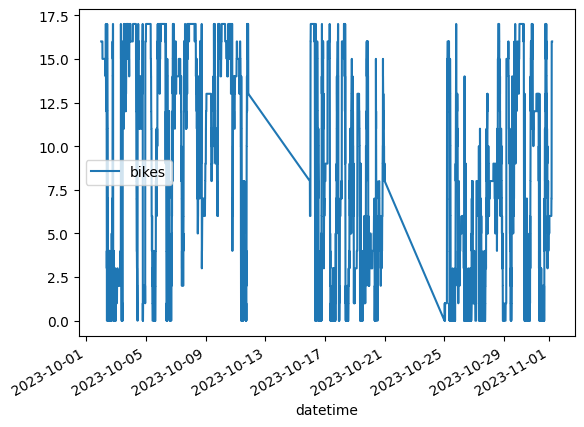

In [84]:
df_time_bike.head(1439*21).plot()